# Mel-Frequency Cepstral Coefficients (MFCC) and Residual Phase Cepstral Coefficients (RPCC)

In this notebook I will calculate the mel-frequency cepstral coefficients and the residual phase cepstral coefficients for a speech signal.

## Importing required libraries

In [1]:
import sys
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

sys.path.append('../')

from aux.reader import read_data
from residualphase import residual_phase

Using TensorFlow backend.


## Loading data

In [3]:
DATA_PATH = '../data/'
data_df = read_data(DATA_PATH)

filename = data_df.path[1021]
samples, sample_rate = librosa.load('../data/' + filename)

# trim signals
samples , _ = librosa.effects.trim(samples, top_db=30)

# sesidual phase calculation
res_phase = residual_phase(samples)

## MFCCs and RPCCs calculation

I am going to calculate the MFCCs and RPCCs using the 'librosa.feature.mfcc'. Detailed explanation of the Mel Cepstrum can be found [here](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/) <br>

In order to have a better estimate of the 

In [40]:
mfcc = librosa.feature.mfcc(samples, n_mfcc=13)
rpcc = librosa.feature.mfcc(res_phase, n_mfcc=13)

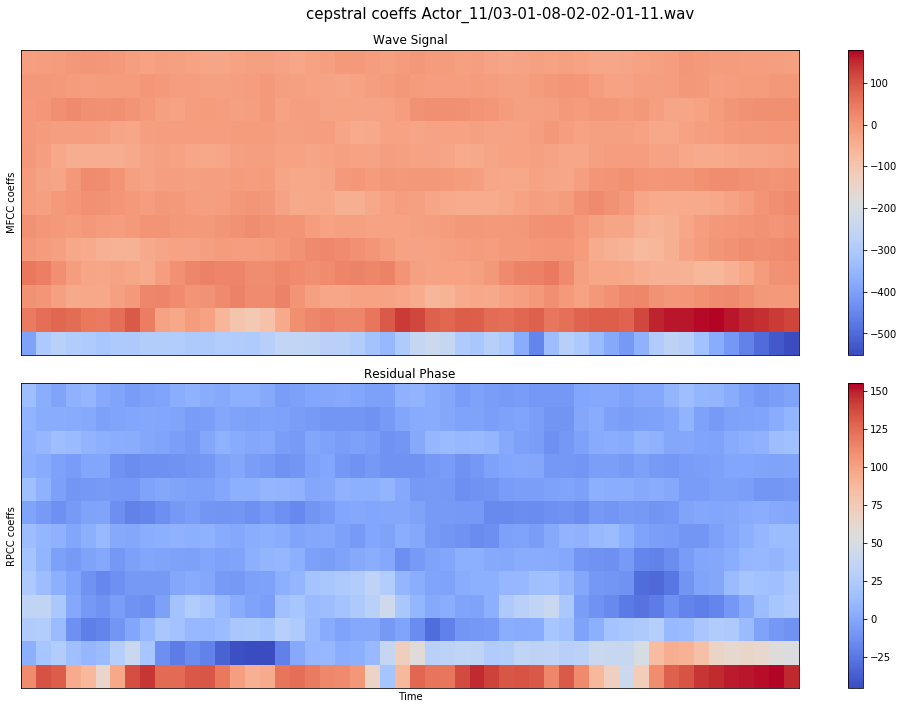

In [41]:
fig = plt.figure(figsize=(14, 10))

plt.subplot(211)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.title('Wave Signal')
plt.colorbar()

plt.subplot(212)
librosa.display.specshow(rpcc)
plt.ylabel('RPCC coeffs')
plt.xlabel('Time')
plt.title('Residual Phase')
plt.colorbar()

plt.suptitle('cepstral coeffs ' + filename, fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# MFCCs and RPCCs derivatives 

To emphatize changes in in the envelopes of the MFCCs and RPCCs, I am going to plot the delta of the cepstral coefficients.

In [31]:
mfcc_delta = librosa.feature.delta(mfcc, order=2)
rpcc_delta = librosa.feature.delta(rpcc, order=2)

mfcc_delta = librosa.feature.delta(mfcc, order=1)
rpcc_delta = librosa.feature.delta(rpcc, order=1)

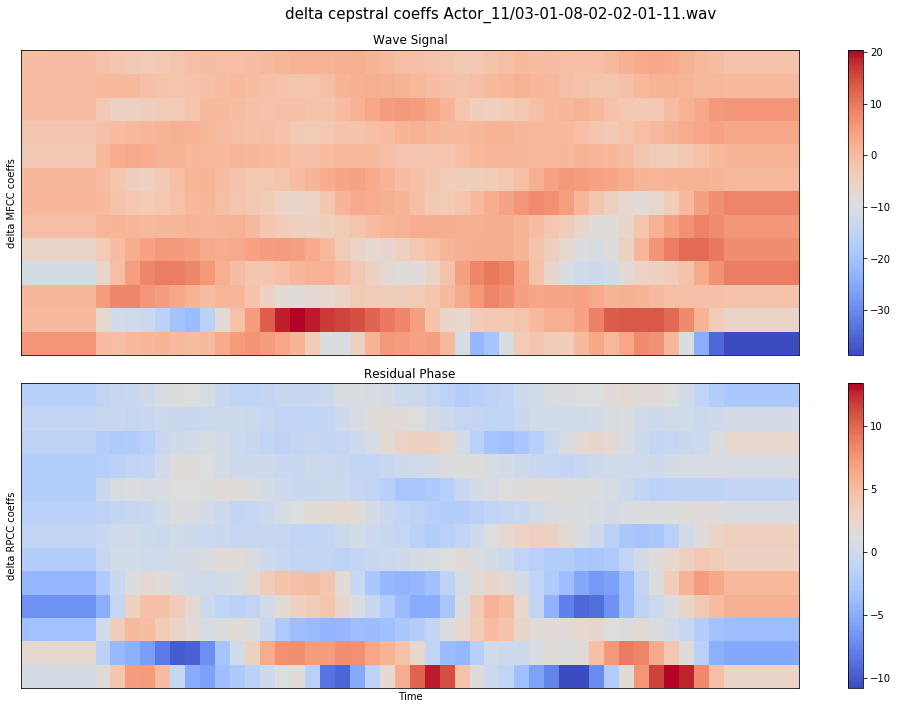

In [32]:
fig = plt.figure(figsize=(14, 10))

plt.subplot(211)
librosa.display.specshow(mfcc_delta)
plt.ylabel('delta MFCC coeffs')
plt.title('Wave Signal')
plt.colorbar()

plt.subplot(212)
librosa.display.specshow(rpcc_delta)
plt.ylabel('delta RPCC coeffs')
plt.xlabel('Time')
plt.title('Residual Phase')
plt.colorbar()

plt.suptitle('delta cepstral coeffs ' + filename, fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

We observe that the the RPCCs show large activity towards lower order while the MFCCs show large activity toward higher order.